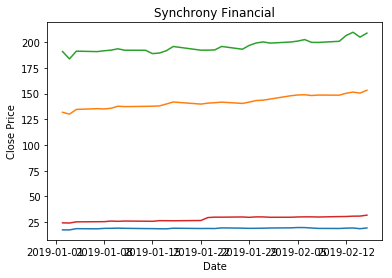

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import pandas_datareader as web
import datetime
pd.options.mode.chained_assignment = None  # default='warn'


bayer_stock_prices = pd.read_csv('bayer_stock_prices.csv')
honeywell_stock_prices = pd.read_csv('honeywell_stock_prices.csv')
mmm_stock_prices = pd.read_csv('3m_stock_prices.csv')
Synchrony_stock_prices = pd.read_csv('Synchrony_stock_prices.csv')

#listed alphabetically, we'll keep this order consistent
all_data = [bayer_stock_prices, honeywell_stock_prices, mmm_stock_prices, Synchrony_stock_prices]

labels = ['Bayer', 'HoneyWell', '3M', 'Synchrony Financial']

for i,data in enumerate(all_data):
    all_data[i]=data.dropna(axis=0)
    
for data in all_data:
    df1=data[mmm_stock_prices.isnull().any(axis=1)]

for i,data in enumerate(all_data):
    df=data
    df['Date'] = pd.to_datetime(df['Date'])

    # Using matplotlib to add required columns
    plt.plot(df['Date'], df['Close'])

    # Adding labels
    plt.xlabel('Date')  
    plt.ylabel('Close Price')  
    plt.title(labels[i]) 


In [87]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2019, 1, 1)

symbols = ['syf', 'bayry', 'hon', 'mmm']

for symbol in symbols:
    df = web.DataReader(symbol, 'yahoo', start, end)
    print(df["Close"].mean())





30.991597870735976
23.353398703282174
113.73010480545929
176.78613987226538
